## Import necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load the data

In [5]:
tt_data = pd.read_csv('../data/train.csv')

In [6]:
tt_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data preprocessing

### Handling missing values

In [9]:
tt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
tt_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Cabin column has too many missing values. So we drop this column.

tt_data = tt_data.drop(columns='Cabin', axis=1)

In [12]:
tt_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# replacing missing values from Age column with their mean

tt_data['Age'] = tt_data['Age'].fillna(tt_data['Age'].median())

In [14]:
# replacing missing values from Embarked column with it's mode

tt_data['Embarked'] = tt_data['Embarked'].fillna(tt_data['Embarked'].mode()[0])

In [15]:
tt_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Statistical Measures

In [17]:
tt_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
tt_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
sns.set()

In [20]:
# count the values from the Survived column

tt_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

0 --> Not survived <br>
1 --> Survived

Text(0.5, 1.0, '# of Survived')

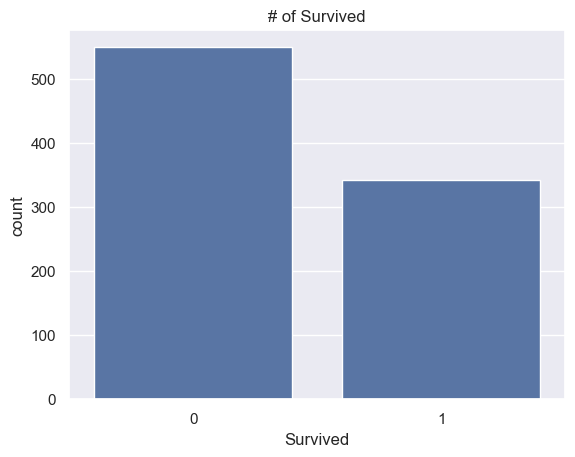

In [22]:
# plot the Survived column using countplot

sns.countplot(x='Survived', data=tt_data)
plt.title('# of Survived')

Sex
male      577
female    314
Name: count, dtype: int64


Text(0.5, 1.0, 'Countplot of Sex column based on Survived')

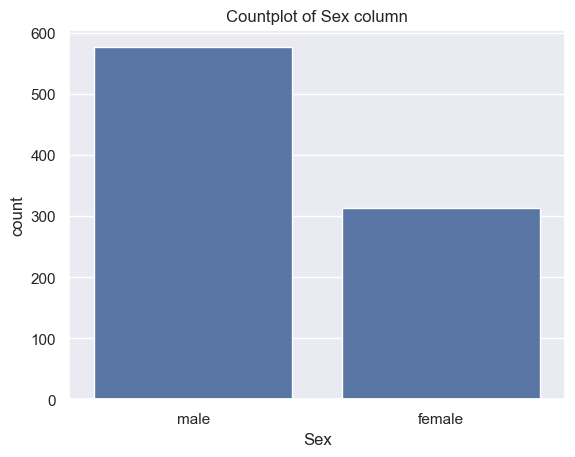

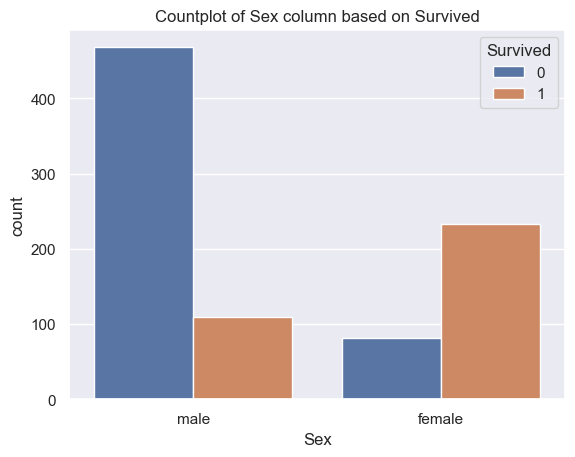

In [23]:
# Count the Sex column and plot it

print(tt_data['Sex'].value_counts())

plt.figure()
sns.countplot(x='Sex', data=tt_data)
plt.title('Countplot of Sex column')

plt.figure()
sns.countplot(x='Sex', hue='Survived', data=tt_data)
plt.title('Countplot of Sex column based on Survived')

1 --> 1st class
2 --> 2nd class
3 --> 3rd class
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Text(0.5, 1.0, 'Countplot of Survived column based on their passenger class')

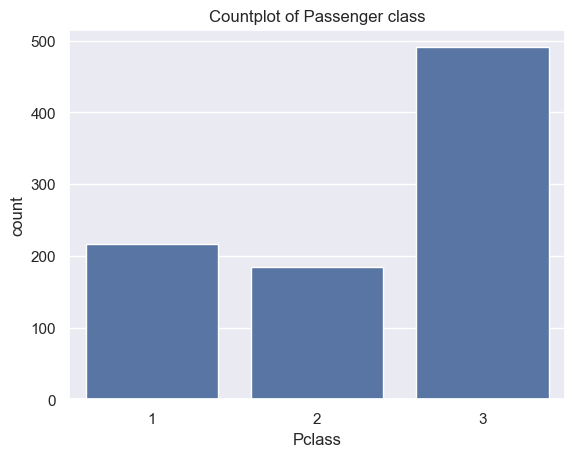

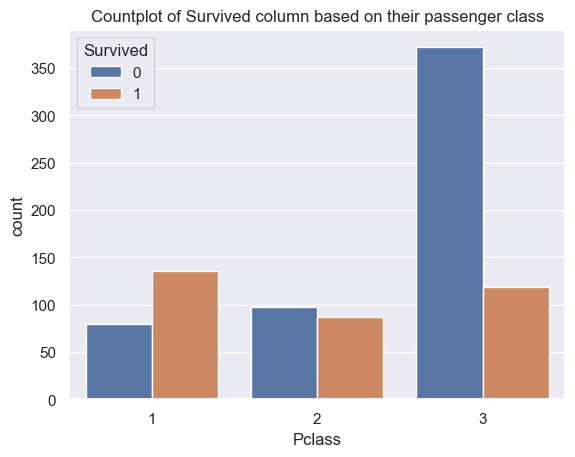

In [24]:
# Count the Pclass column and plot it

print('1 --> 1st class\n2 --> 2nd class\n3 --> 3rd class\n', tt_data['Pclass'].value_counts())

plt.figure()
sns.countplot(x='Pclass', data=tt_data)
plt.title('Countplot of Passenger class')

plt.figure()
sns.countplot(x='Pclass', hue='Survived', data=tt_data)
plt.title('Countplot of Survived column based on their passenger class')

 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Text(0.5, 1.0, 'Countplot of Survived column based on having siblings and spouse')

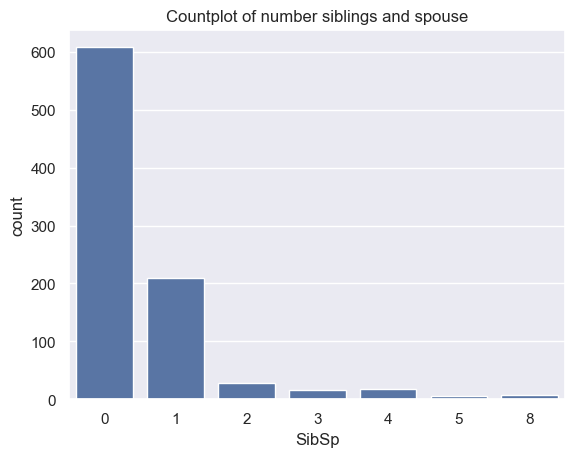

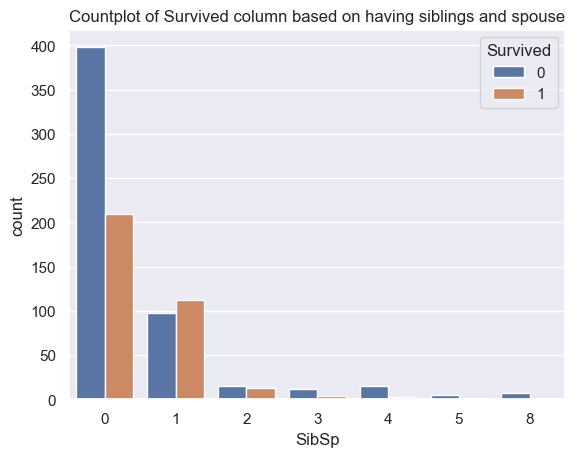

In [25]:
# Count the number of sibling and spouse column and plot it

print('', tt_data['SibSp'].value_counts())

plt.figure()
sns.countplot(x='SibSp', data=tt_data)
plt.title('Countplot of number siblings and spouse')

plt.figure()
sns.countplot(x='SibSp', hue='Survived', data=tt_data)
plt.title('Countplot of Survived column based on having siblings and spouse')

 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


Text(0.5, 1.0, 'Countplot of Survived column based on having parent and children')

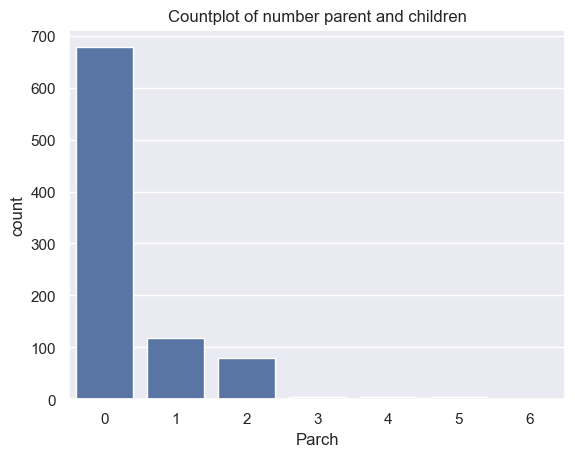

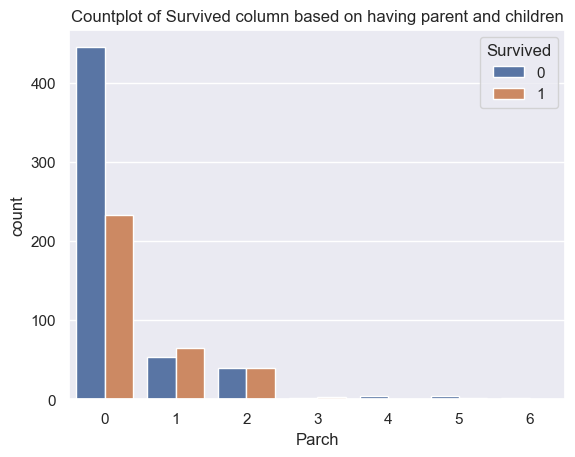

In [26]:
# Count the number of parent and children column and plot it

print('', tt_data['Parch'].value_counts())

plt.figure()
sns.countplot(x='Parch', data=tt_data)
plt.title('Countplot of number parent and children')

plt.figure()
sns.countplot(x='Parch', hue='Survived', data=tt_data)
plt.title('Countplot of Survived column based on having parent and children')

 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


Text(0.5, 1.0, 'Countplot of Survived column based on the places passengers get on from')

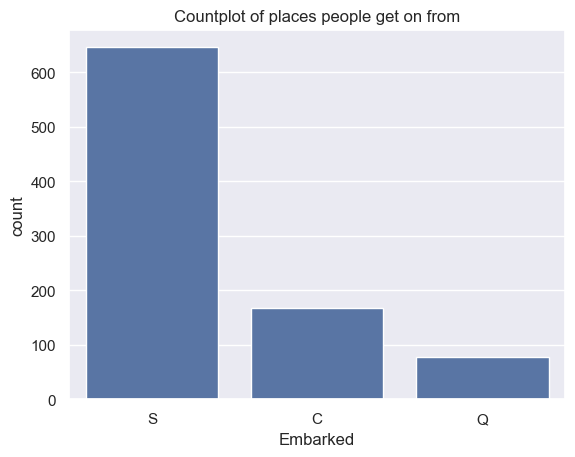

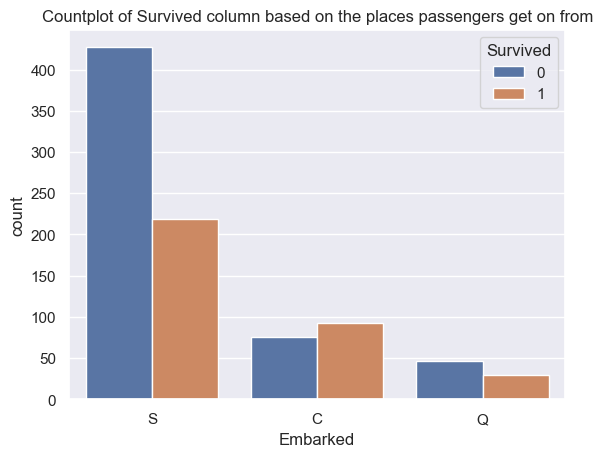

In [27]:
# Count the number of Embarked column and plot it

print('', tt_data['Embarked'].value_counts())

plt.figure()
sns.countplot(x='Embarked', data=tt_data)
plt.title('Countplot of places people get on from')

plt.figure()
sns.countplot(x='Embarked', hue='Survived', data=tt_data)
plt.title('Countplot of Survived column based on the places passengers get on from')

In [28]:
tt_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Feature Engineering

#### 1. Create New Features

**a. Extract Titles from Name**

In [108]:
tt_data['Title'] = tt_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

print(f'All the titles before title mapping: {tt_data['Title'].value_counts()}')
# Optional: Group uncommon titles together
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Lady': 'Royalty', 'Countess': 'Royalty', 'Sir': 'Royalty', 'Jonkheer': 'Royalty', 'Don': 'Royalty',
    'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer'
}
tt_data['Title'] = tt_data['Title'].replace(title_mapping)

# Check title counts
tt_data['Title'].value_counts()

All the titles before title mapping: Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


Title
Mr              517
Miss            185
Mrs             126
Master           40
Officer          18
Royalty           4
the Countess      1
Name: count, dtype: int64

**b. Create Family Size and isAlone feature**

In [34]:
# Create FamilySize feature
tt_data['FamilySize'] = tt_data['SibSp'] + tt_data['Parch'] + 1

# Create IsAlone feature
tt_data['IsAlone'] = 1  # Initialize to 1 (indicating alone)
tt_data['IsAlone'].loc[tt_data['FamilySize'] > 1] = 0  # Set to 0 if FamilySize > 1

# Check the new features
tt_data[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head()

C:\Users\Nazm\AppData\Local\Temp\ipykernel_8992\169034924.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tt_data['IsAlone'].loc[tt_data['FamilySize'] > 1] = 0  # Set to 0 if FamilySize > 1
C:\Users\Nazm\AppData\Local\Temp\ipykernel_8992

,SibSp,Parch,FamilySize,IsAlone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1


**c. Extract Ticket Prefix**

In [36]:
# Extracting Ticket Prefix (if any)
tt_data['TicketPrefix'] = tt_data['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'None')

# Check TicketPrefix counts
tt_data['TicketPrefix'].value_counts()

TicketPrefix
None          665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

**d. Fare Binning**

In [38]:
# Create FareBin by grouping Fare into quartiles
tt_data['FareBin'] = pd.qcut(tt_data['Fare'], 4, labels=['Low', 'Mid', 'High', 'VeryHigh'])

# Check distribution
tt_data[['Fare', 'FareBin']].head()

,Fare,FareBin
0,7.2500,Low
1,71.2833,VeryHigh
2,7.9250,Mid
3,53.1000,VeryHigh
4,8.0500,Mid


**e. Age Binning**

In [40]:
tt_data['AgeBin'] = pd.cut(tt_data['Age'], bins=[0, 12, 18, 35, 60, 120], labels=['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior'])


tt_data[['Age', 'AgeBin']].head()

,Age,AgeBin
0,22.0,Adult
1,38.0,Middle Age
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult


#### 2. Encoding categorical data

**a. One-hot encoding categorical variables**

In [43]:
# One-Hot Encode categorical variables like 'Sex', 'Embarked', 'Title', and 'TicketPrefix'
categorical_features = ['Sex', 'Embarked', 'Title', 'TicketPrefix']

# Apply one-hot encoding
tt_data = pd.get_dummies(tt_data, columns=categorical_features, drop_first=True)

# Check the updated dataset
tt_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,...,TicketPrefix_SOTON/O.Q.,TicketPrefix_SOTON/O2,TicketPrefix_SOTON/OQ,TicketPrefix_STON/O,TicketPrefix_STON/O2.,TicketPrefix_SW/PP,TicketPrefix_W./C.,TicketPrefix_W.E.P.,TicketPrefix_W/C,TicketPrefix_WE/P
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,...,False,False,False,False,True,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,...,False,False,False,False,False,False,False,False,False,False


**b. Label encoding for ordinal variables**

In [45]:
# Label encode AgeBin and FareBin 
label_encoder = LabelEncoder()

# Encoding 'AgeBin' and 'FareBin'
tt_data['AgeBin_Label'] = label_encoder.fit_transform(tt_data['AgeBin'])
tt_data['FareBin_Label'] = label_encoder.fit_transform(tt_data['FareBin'])

# Drop the original AgeBin and FareBin (optional)
tt_data.drop(['AgeBin', 'FareBin'], axis=1, inplace=True)

# Check the encoded labels
tt_data[['AgeBin_Label', 'FareBin_Label']].head()

,AgeBin_Label,FareBin_Label
0,0,1
1,2,3
2,0,2
3,0,3
4,0,2


In [46]:
# Save the cleaned and encoded DataFrame to a CSV file
tt_data.to_csv('../data/titanic_cleaned_encoded.csv', index=False)

# Print a confirmation message
print("Cleaned and encoded data saved to 'titanic_cleaned_encoded.csv'")

Cleaned and encoded data saved to 'titanic_cleaned_encoded.csv'


In [47]:
# tt_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S':0, 'C': 1, 'Q': 2}}, inplace=True)

## Separating the features and target

In [49]:
X = tt_data.drop(columns=['Survived', 'Name', 'Ticket'], axis=1)
Y = tt_data['Survived']

## Splitting into training and testing sets(validation sets)
Split the training data into training and validation sets:

In [51]:
# Split the training data into training and validation sets:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model training using `LogisticRegression`

In [53]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training set
logreg.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

C:\Users\Nazm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

In [55]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.8156
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
 [[91 14]
 [19 55]]


## Hyperparameter Tuning

In [57]:
# Define the model
logistic_model = LogisticRegression(max_iter=500)

# Create a parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # 'liblinear' is good for small datasets and supports l1 penalty
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8301


In [58]:
# Train the model with the best parameters
optimized_logistic_model = LogisticRegression(**best_params, max_iter=500)
optimized_logistic_model.fit(X_train, Y_train)

# Make predictions and evaluate
y_pred_optimized = optimized_logistic_model.predict(X_test)

# Evaluate the optimized model
optimized_accuracy = accuracy_score(Y_test, y_pred_optimized)
print(f'Optimized Logistic Regression Accuracy: {optimized_accuracy:.4f}')
print("Optimized Classification Report:\n", classification_report(Y_test, y_pred_optimized))

Optimized Logistic Regression Accuracy: 0.8045
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [59]:
# # predict on the training sets

# training_set_prediction = logreg.predict(X_train)

# training_set_accuracy = accuracy_score(Y_train, training_set_prediction)

# print('Accuracy score on training set: ', training_set_accuracy)

In [60]:
# # predict on the test/validation sets

# test_prediction = logreg.predict(X_test)

# test_set_accuracy = accuracy_score(Y_test, test_prediction)

# print('Accuracy score on training set: ', test_set_accuracy)

## Make prediction

In [62]:
# load test data

test_data = pd.read_csv('../data/test.csv')

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
# data preprocessing

test_data.shape


(418, 11)

In [64]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64